## 1. 题目

### E27653: Fraction类

http://cs101.openjudge.cn/pctbook/E27653/

请练习用OOP方式实现。

思路：要求面向对象编程，本题仅要求实现分数加法，首先定义fraction类，以及分子分母两个属性，然后定义分数加法的运算，并加入化简功能（采用辗转相除法求得最大公约数），最后定义str函数用于输出要求的字符串格式。
在class中定义的运算以及函数在对类的实例进行操作时会自动调用。



代码：

```python
class fraction:
    def __init__(self,numerator,denominator):
        self.numerator=numerator
        self.denominator=denominator
    def __str__(self):
        if self.denominator==1:
            return self.numerator
        return f"{self.numerator}/{self.denominator}"
    def __add__(self,other):
        numerator=self.numerator*other.denominator+other.numerator*self.denominator
        denominator=self.denominator*other.denominator
        a=numerator
        b=denominator
        while b!=0:
            a,b=b,a%b
        numerator//=a
        denominator//=a
        return fraction(numerator,denominator)
    
l=list(input().split(' '))
print(str(fraction(int(l[0]),int(l[1]))+fraction(int(l[2]),int(l[3]))))
```





代码运行截图 <mark>（至少包含有"Accepted"）</mark>
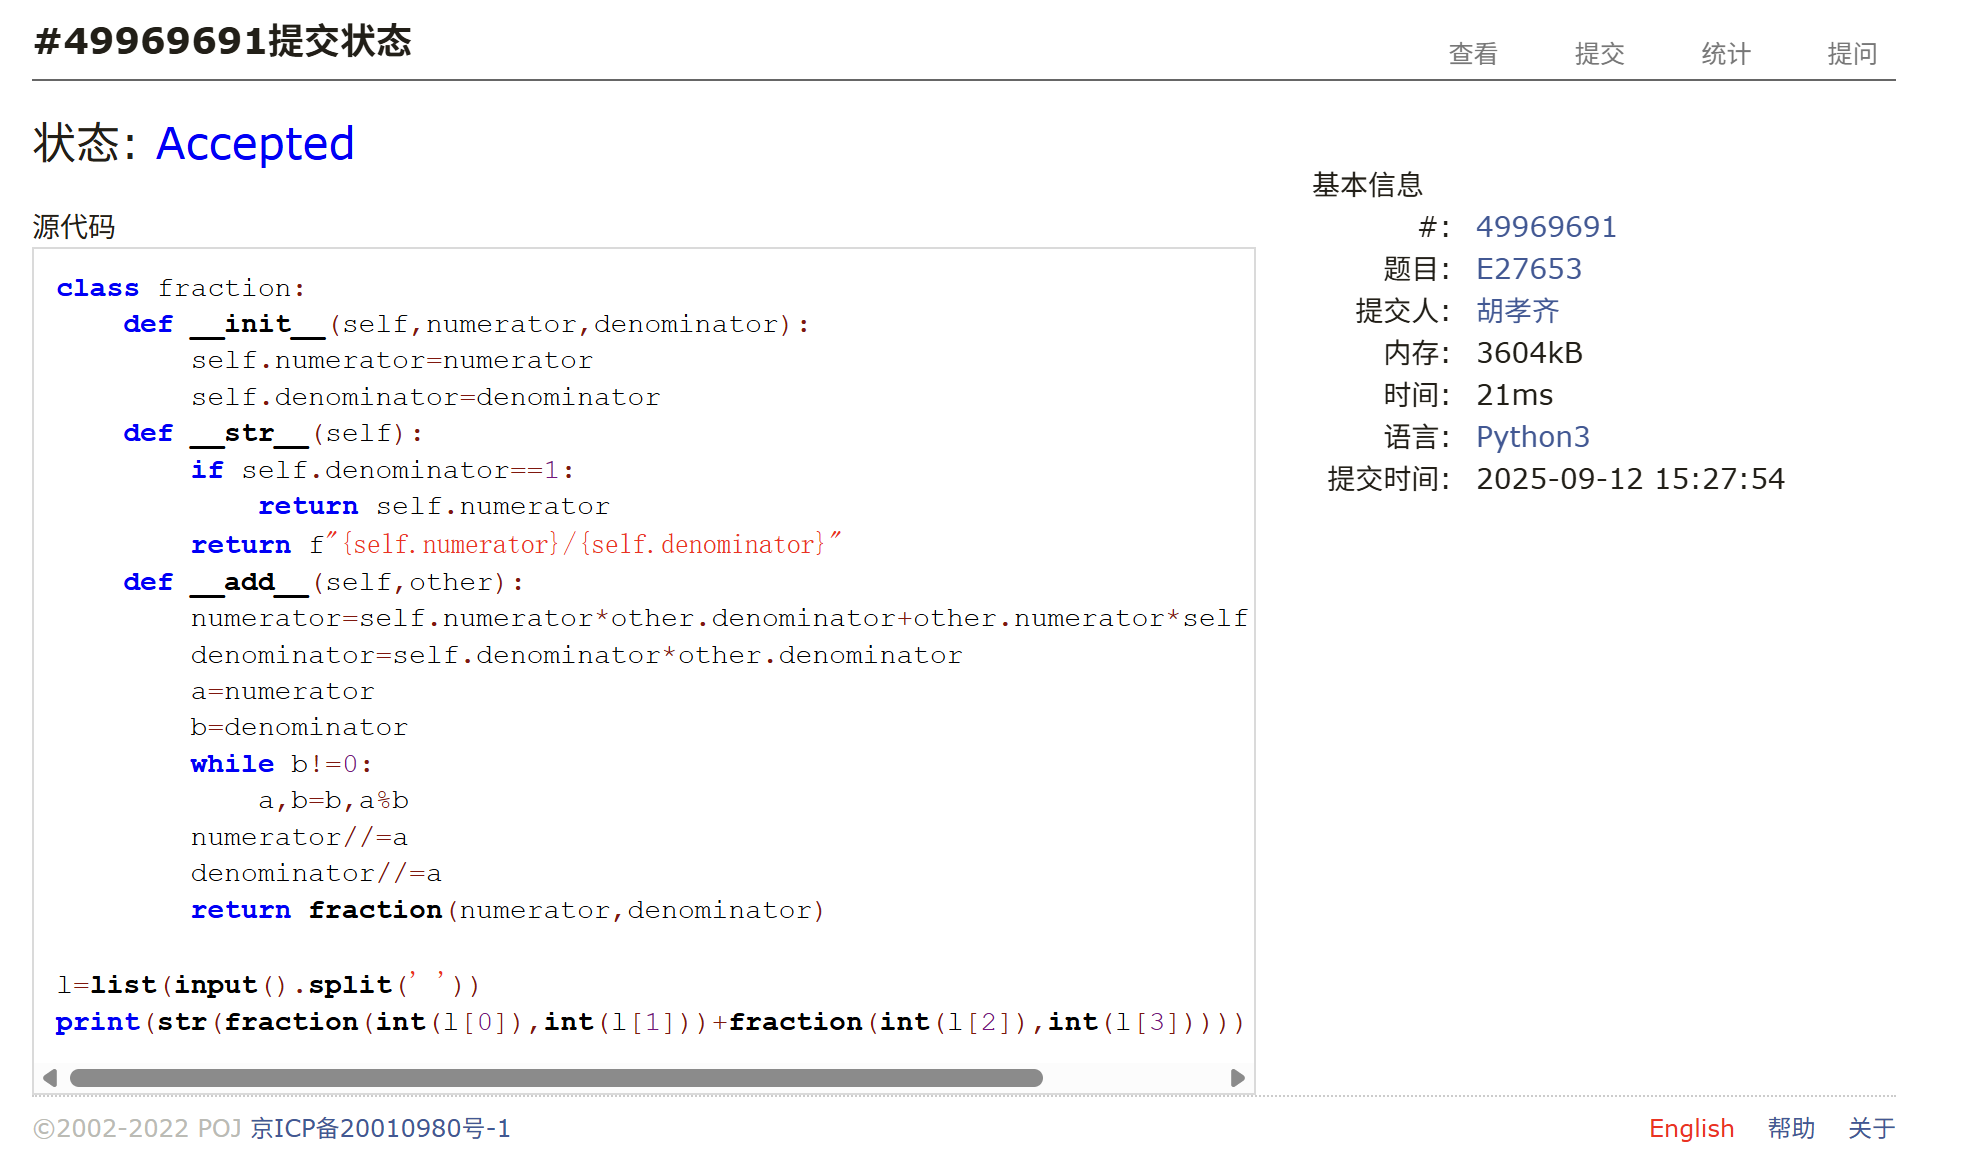




### M1760.袋子里最少数目的球

binary search, https://leetcode.cn/problems/minimum-limit-of-balls-in-a-bag/




思路：
要求使用二分查找，而对于数组中每一个数x，达到目标开销所需的操作次数为[$\frac{x-1}{y}$]，因而对于每一开销值，我们都能遍历数组求出对于目标开销值所需的最少总操作次数，再使用二分查找，快速确定给定最大操作次数下的最小开销，控制时间复杂度在NlogN。
值得注意的是，本题由maxOperation求最小开销复杂（应该需要巨量的枚举），但是通过开销求operation数相对轻松，而开销本身是在一定范围限制下的，因此反过来枚举是可行的，而使用二分法可以进一步优化复杂度。


代码：

```python
class Solution:
    def minimumSize(self, nums: List[int], maxOperations: int) -> int:
        i=1
        j=max(nums)
        l=len(nums)
        a=0
        while i<=j:
            d=(i+j)//2
            s=0
            for k in range(l):
                s+=(nums[k]-1)//d
            if s<=maxOperations:
                a=d
                j=d-1
            else:
                i=d+1
        return a
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
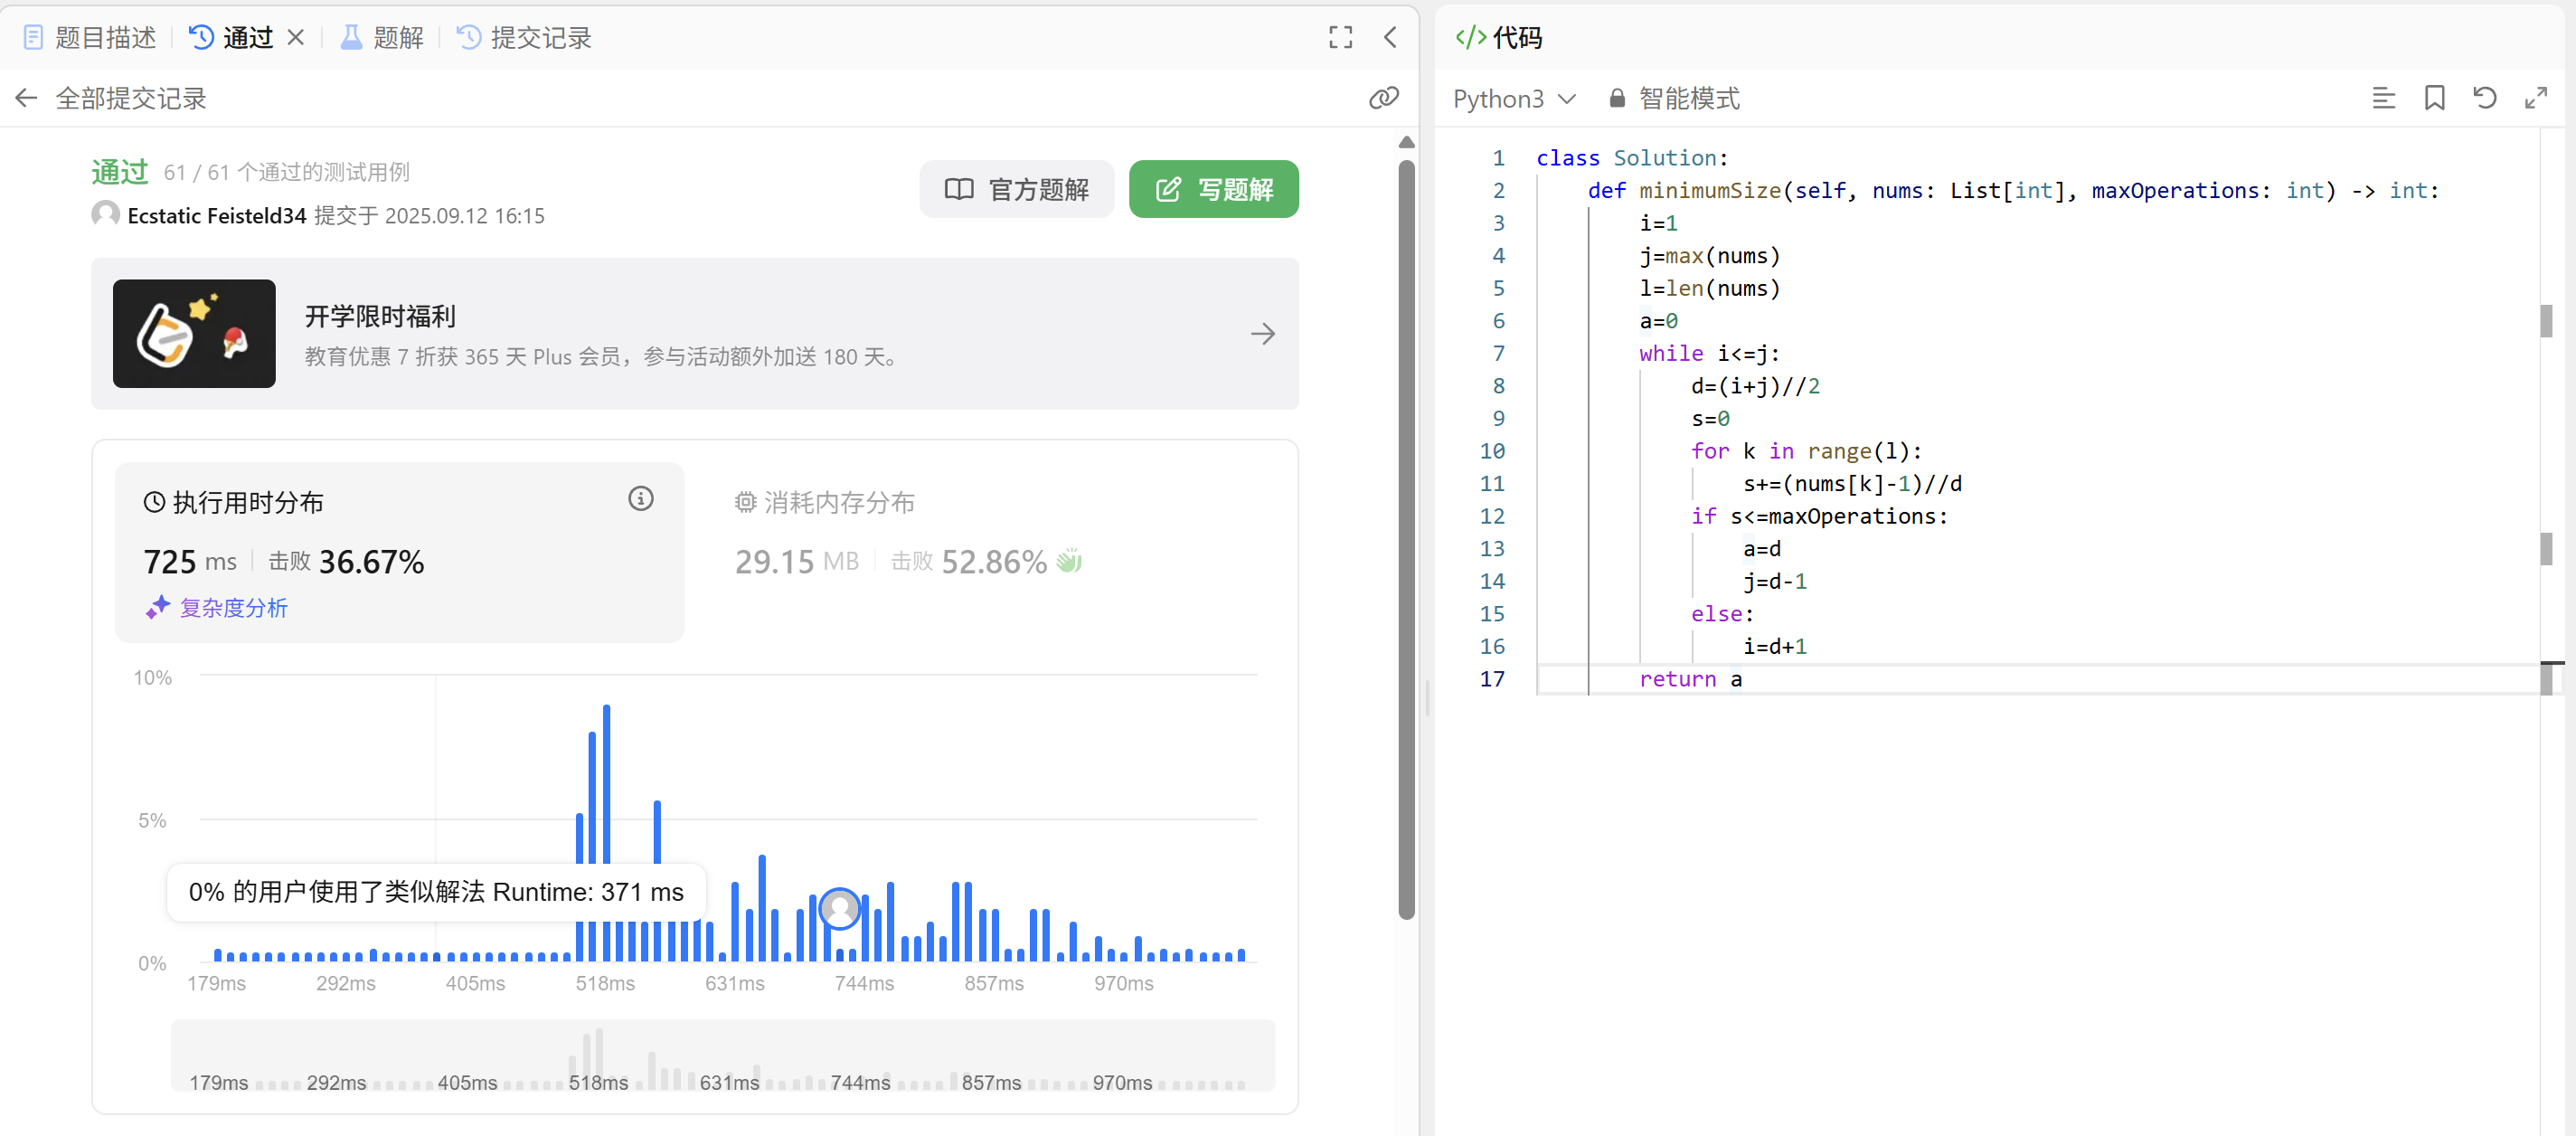




### M04135: 月度开销

binary search, http://cs101.openjudge.cn/pctbook/M04135/



思路：
本题，对于给定的m，找到最小开销并不容易，只能通过很高复杂度的枚举达成，而对于给定的开销值，我们不难通过N复杂度的遍历求得所需的‘m’，因此就算枚举，这样反过来求解的复杂度也只是O(kN)，由于这是一个一串数寻找分界点的问题，可以使用二分法优化为Nlogk复杂度。


代码：

```python
n,m=map(int,input().split())
l=[]
for i in range(n):
    l.append(int(input().strip()))
i=max(l)
j=sum(l)
while i<=j:
    d=(i+j)//2
    num=1
    s=0
    for k in range(n):
        if s+l[k]>d:
            s=l[k]
            num+=1
        else:
            s+=l[k]
    if num<=m:
        ans=d
        j=d-1
    else:
        i=d+1
print(ans)
```




代码运行截图 <mark>（至少包含有"Accepted"）</mark>
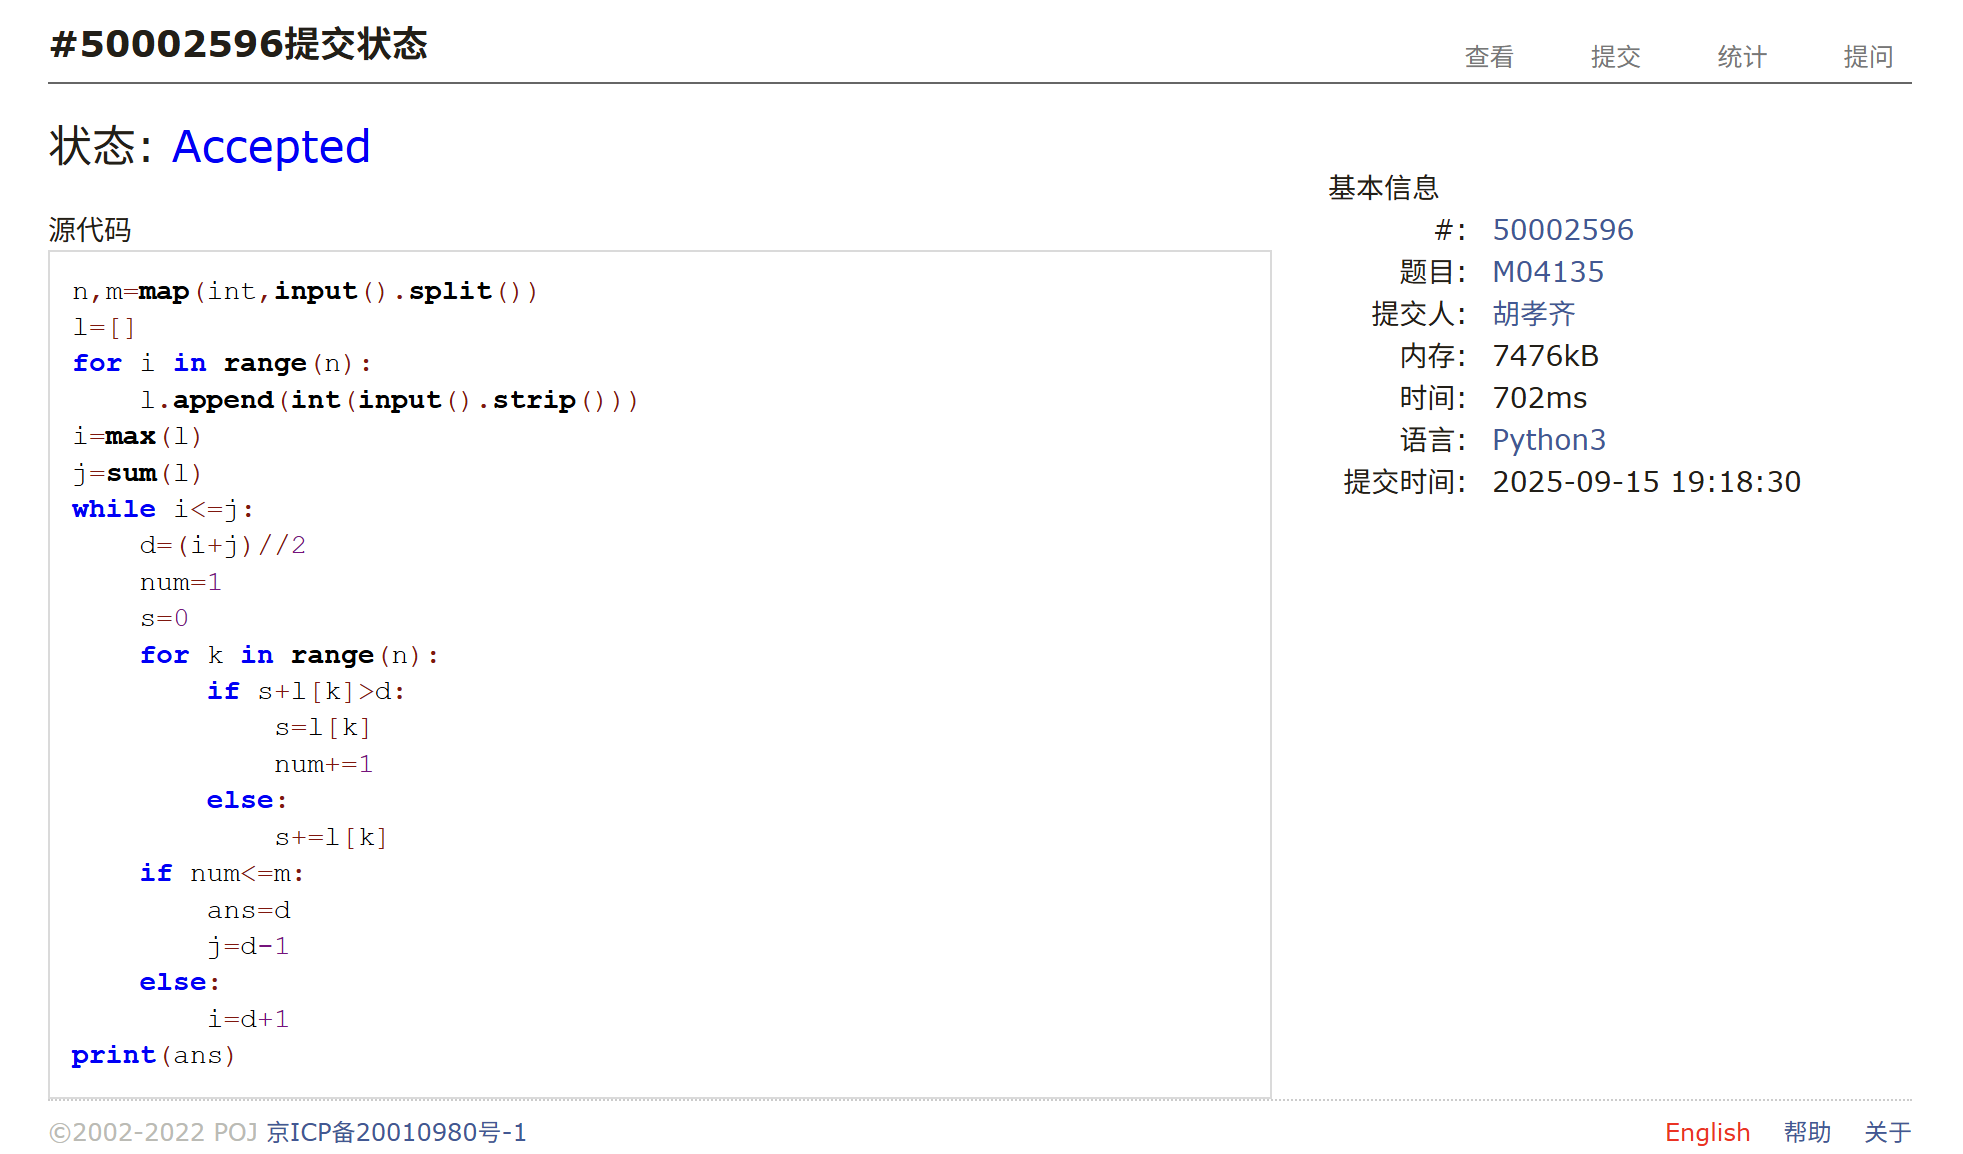




### M27300: 模型整理

sortings, AI, http://cs101.openjudge.cn/pctbook/M27300/



思路：
本题原本考虑使用字典，但鉴于字典排序没法处理，使用二维列表（矩阵），将每个模型的名称，大小，单位放入其中，其中大小含小数，故采用浮点数处理，但输出是不能采用浮点数，因此将大小和用于输出的形式分别储存。
排序按照名称、大小进行，以B结尾的必然大于以M结尾的，故排序按照名称、单位、数字大小进行，排序完毕后输出即可。


代码：

```python
n=int(input())
l=[]
for i in range(n):
    name,q=map(str,input().split('-'))
    l.append([name,float(q[:-1]),q[:-1],q[-1]])
l.sort(key=lambda x: x[1])
l.sort(key=lambda x: x[3],reverse=True)
l.sort(key=lambda x: x[0])
for i in range(len(l)):
    if i==0:
        print(l[i][0]+": "+l[i][2]+l[i][3],end='')
    elif l[i-1][0]!=l[i][0]:
        print()
        print(l[i][0]+": "+l[i][2]+l[i][3],end='')
    else:
        print(', '+l[i][2]+l[i][3],end='')
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
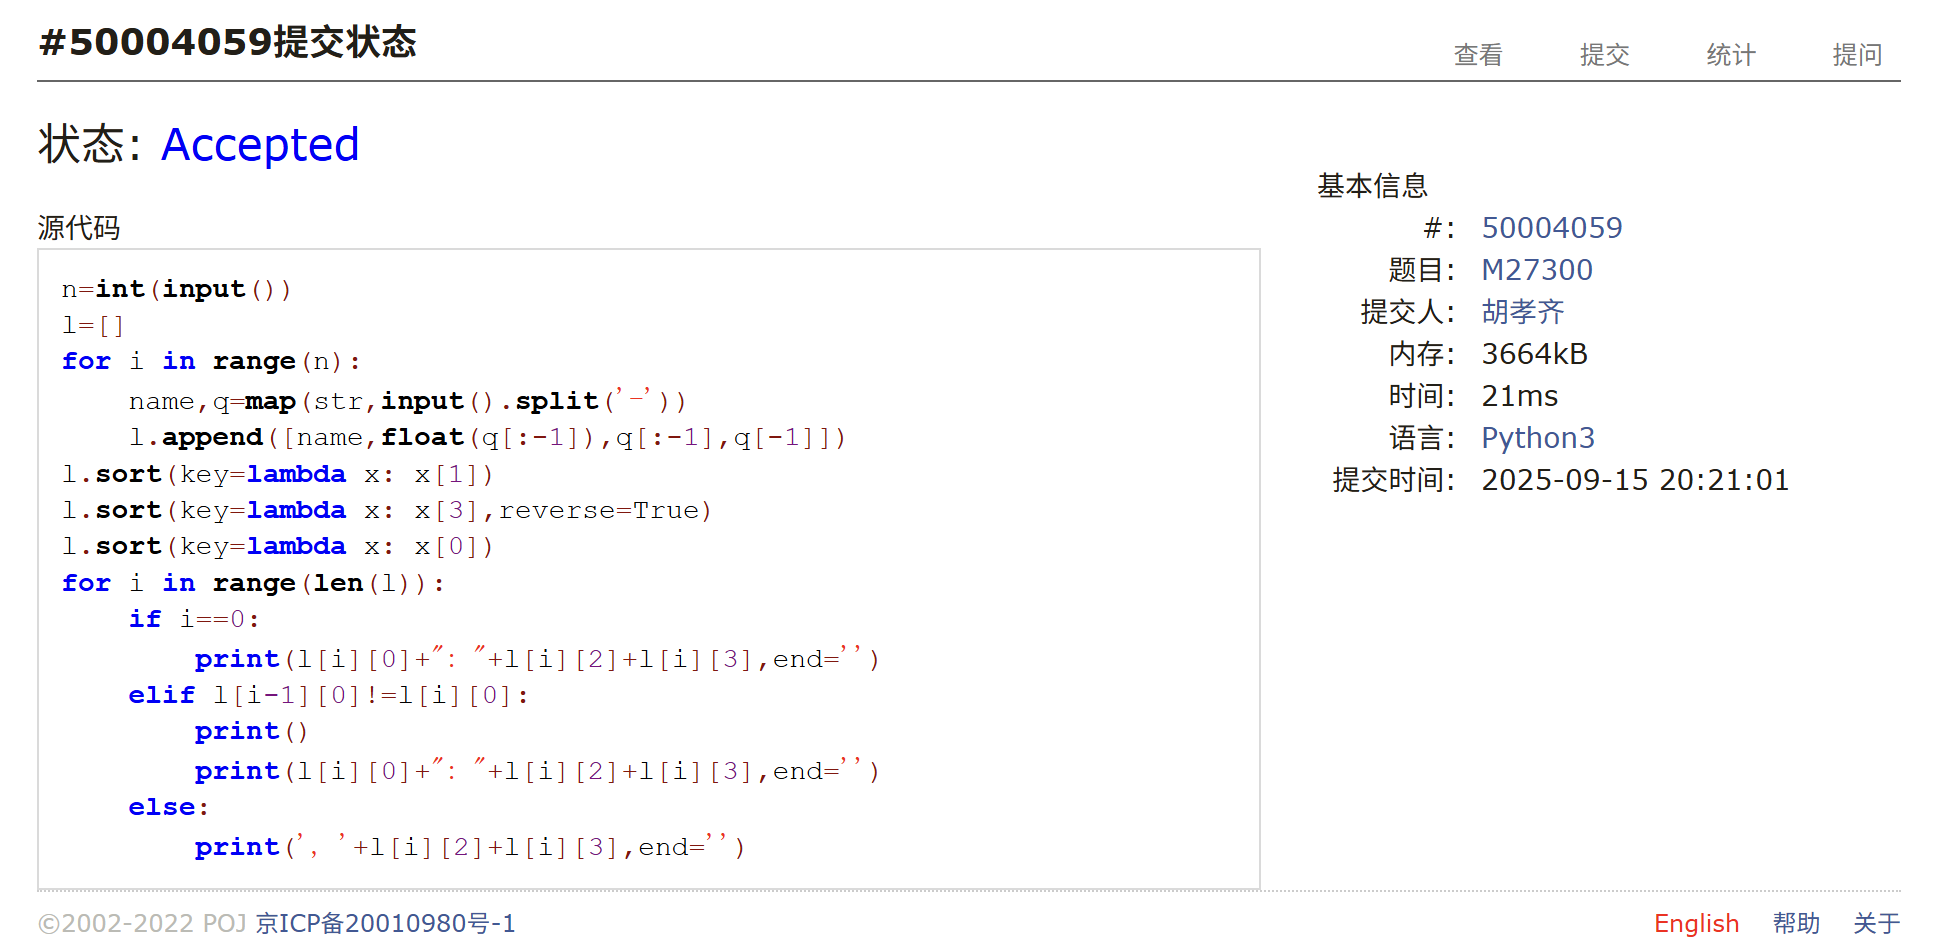




### Q5. 熟悉云虚拟机Linux环境与大语言模型（LLM）本地部署

本项目包括两个任务：

1）通过云虚拟机（如 https://clab.pku.edu.cn/ 提供的资源）熟悉Linux系统操作环境。

2）完成大语言模型（LLM）的本地部署与功能测试。

LLM 部署可选择使用图形化工具（如 LM Studio, https://lmstudio.ai）以简化配置流程，提升部署效率。部署完成后，需对模型进行实际能力测试。

测试内容包括：从主流在线编程评测平台（如 OpenJudge、Codeforces、LeetCode 或洛谷等）选取若干编程题目，提交由本地部署的 LLM 生成的代码解决方案，并确保其能够通过全部测试用例，获得“Accepted”状态。选题时应避免与已知可被 AI 正确解答的题目重复。当前已确认可通过的 AI 解题列表可参考以下 GitHub 仓库： 

https://github.com/GMyhf/2025spring-cs201/blob/main/AI_accepted_locally.md



请提供你的项目进展，内容应该包括：关键操作步骤的截图以及遇到的技术问题及相应的解决方法。这将有助于全面掌握项目推进情况，并为后续优化与扩展提供依据。





### Q6. 阅读《Build a Large Language Model (From Scratch)》第一章

作者：Sebastian Raschka

请整理你的学习笔记。这应该包括但不限于对第一章核心概念的理解、关键术语的解析、学习过程中的思考与启发，以及尚存的疑问与反思。通过系统梳理，不仅有助于巩固自身理解，也希望为其他学习者提供有价值的参考。





## 2. 学习总结和个人收获
二分查找法适用于在一系列连续的值中找到符合一定大小关系的最值，是对遍历的一种优化。要求一定要单调。